In [1]:
import numpy as np

from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.metrics import accuracy_score, mean_squared_error, euclidean_distances
from sklearn.utils.validation import check_array, check_is_fitted, check_X_y

from scipy.stats import mode

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(42)

In [2]:
class KNeighborsClassifier(BaseEstimator, ClassifierMixin):
    """A naive K-nearest neighbors classifier implementation.
    
    Parameters
    ----------
    n_neighbors : int, default=5
        A hyperparmeter specifing the (positive) number of closest training instances.
    """
    def __init__(self, *, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        """Stores the training instances.

        Parameters
        ----------
        X : np.ndarray
            2D feature matrix with shape (n_samples, n_features) of
            numerical values.

        y : np.ndarray
            1D target array with shape (n_samples,) of categorical values.

        Raises
        ------
        ValueError
            If `n_neighbors` attribute is neither between one and the
            feature matrix length nor an integer.
        """
        X, y = check_X_y(X, y)

        if not (1 <= self.n_neighbors <= len(X) and isinstance(self.n_neighbors, int)):
            raise ValueError(
                "`n_neighbors` must be an integer between one and the feature matrix length."
            )

        self.X_ = X
        self.y_ = y

        return self

    def predict(self, X):
        """Assigns approximate categorical values from the test dataset.

        Parameters
        ----------
        X : np.ndarray
            2D test feature matrix with shape (n_samples, n_features) of
            numerical values.

        Returns
        -------
        np.ndarray
        """
        check_is_fitted(self)
        X = check_array(X)

        closest = np.argsort(euclidean_distances(X, self.X_), axis=1)[:, :self.n_neighbors]
        neighbors  = mode(self.y_[closest], axis=1, keepdims=False)
        return neighbors.mode 

    def score(self, X, y):
        """Evaluates the performance of a K-nearest neighbors classifier.

        The metric used to evaluate the performance of a K-nearest
        neighbors classifier is `sklearn.metrics.accuracy_score`.

        Parameters
        ----------
        X : np.ndarray
            2D test feature matrix with shape (n_samples, n_features) of
            numerical values.

        y : np.ndarray
            1D test target array with shape (n_samples,) of categorical
            values.
        """
        check_is_fitted(self)
        X, y = check_X_y(X, y)

        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


class KNeighborsRegressor(BaseEstimator, RegressorMixin):
    """A naive K-nearest neighbors regressor implementation.
    
    Parameters
    ----------
    n_neighbors : int, default=5
        A hyperparmeter specifing the (positive) number of closest training instances.
    """
    def __init__(self, *, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        """Stores the training instances.

        Parameters
        ----------
        X : np.ndarray
            2D feature matrix with shape (n_samples, n_features) of
            numerical values.

        y : np.ndarray
            1D target array with shape (n_samples,) of numerical values.

        Raises
        ------
        ValueError
            If `n_neighbors` attribute is neither between one and the
            feature matrix length nor an integer.
        """
        X, y = check_X_y(X, y, y_numeric=True)

        if not (1 <= self.n_neighbors <= len(X) and isinstance(self.n_neighbors, int)):
            raise ValueError(
                "`n_neighbors` must be an integer between one and the feature matrix length."
            )

        self.X_ = X
        self.y_ = y

        return self

    def predict(self, X):
        """Assigns approximate numerical values from the test dataset.

        Parameters
        ----------
        X : np.ndarray
            2D test feature matrix with shape (n_samples, n_features) of
            numerical values.

        Returns
        -------
        np.ndarray
        """
        check_is_fitted(self)
        X = check_array(X)

        neighbors = np.argsort(euclidean_distances(X, self.X_), axis=1)[:, :self.n_neighbors]
        return np.mean(self.y_[neighbors], axis=1)

    def score(self, X, y):
        """Evaluates the performance of a K-nearest neighbors regressor.

        The metric used to evaluate the performance of a K-nearest
        neighbors regressor is `sklearn.metrics.mean_square_error`.

        Parameters
        ----------
        X : np.ndarray
            2D test feature matrix with shape (n_samples, n_features) of
            numerical values.

        y : np.ndarray
            1D test target array with shape (n_samples,) of numerical
            values.
        """
        check_is_fitted(self)
        X, y = check_X_y(X, y, y_numeric=True)

        y_pred = self.predict(X)
        return mean_squared_error(y, y_pred)

In [5]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# add noisy instance to existing dataset
X = np.insert(X, 0, [[1.75, -0.3]], axis=0)
y = np.insert(y, 0, [0], axis=0)

# Demonstration of the closest training instances from [2, -0.37] with `n_neighbors=3`

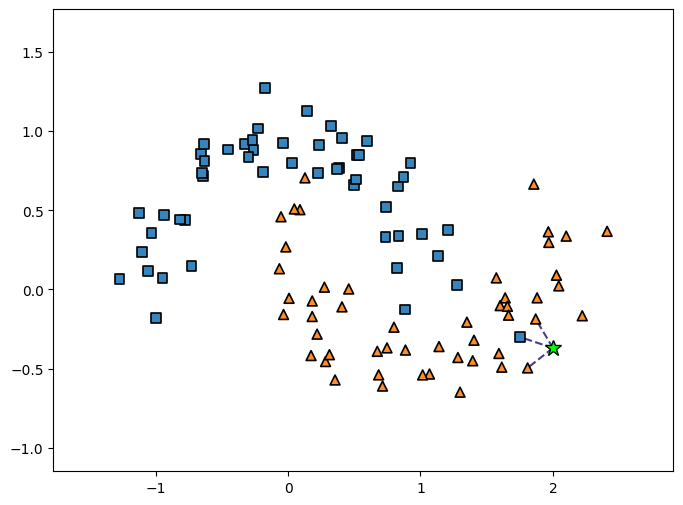

In [13]:
pallete = ['#3785bc', '#ff8d28']

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

n_neighbors = 3
test_point = np.array([[2., -0.37]])

# _________________________________________________________________

plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], c=y[y == 0], s=50, linewidth=1.2, cmap=ListedColormap(pallete[0]), marker="s", edgecolors='k', zorder=2)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c=y[y == 1], s=50, linewidth=1.2, cmap=ListedColormap(pallete[1]), marker="^", edgecolors='k', zorder=2)

plt.plot(test_point[0, 0], test_point[0, 1], marker="*", markersize=12, markeredgecolor="k", markerfacecolor="lime", zorder=2)

closest = np.argsort(euclidean_distances(X, test_point), axis=0)[:n_neighbors]
neighbors = X[closest.ravel()]

for xx in neighbors:
    z = zip(test_point.reshape(-1), xx)
    plt.plot(*z, c='darkslateblue', linestyle='--', linewidth=1.5, zorder=1)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

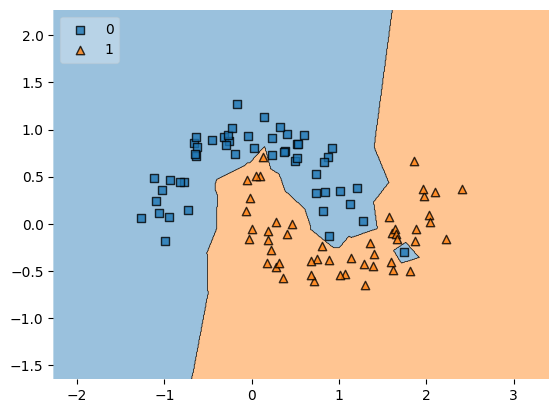

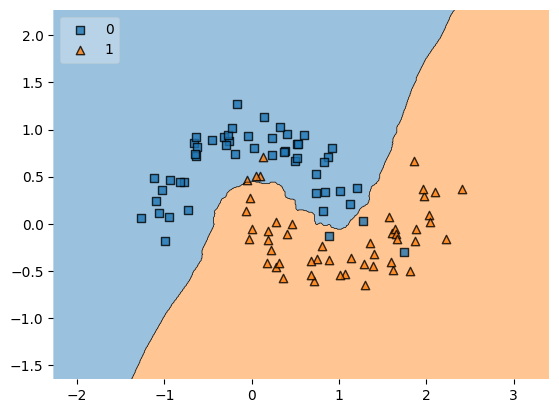

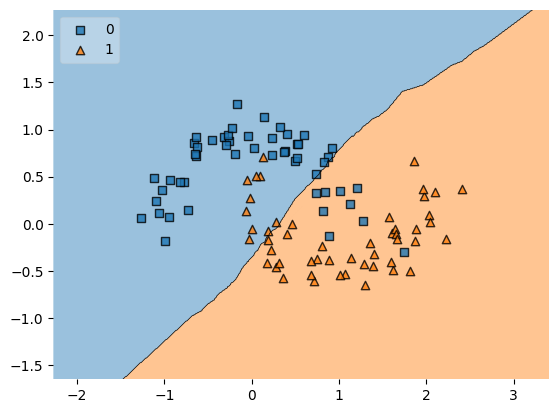

In [14]:
from mlxtend.plotting import plot_decision_regions

for n_neighbors in 1, 15, 55:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.show()

In [15]:
from mpitree import DecisionTreeClassifier 

from sklearn.datasets import load_iris
iris = load_iris()

try:
    clf = DecisionTreeClassifier()
    clf.fit(iris.data[:, :2], iris.target)
    print(clf)
except AssertionError:
    ...

In [16]:
clf = DecisionTreeClassifier().fit(X, y)
print(clf)

┌── feature_1
│  ├── feature_0 [> 0.03]
│  │  ├── feature_1 [> 1.27]
│  │  │  └── class: 1 [> 0.07]
│  │  │  └── class: 0 [<= 0.07]
│  │  ├── feature_1 [<= 1.27]
│  │  │  ├── feature_0 [<= 0.71]
│  │  │  │  ├── feature_1 [<= 0.24]
│  │  │  │  │  ├── feature_1 [<= 0.50]
│  │  │  │  │  │  ├── feature_1 [> 0.13]
│  │  │  │  │  │  │  ├── feature_1 [> 0.15]
│  │  │  │  │  │  │  │  ├── feature_1 [<= 0.47]
│  │  │  │  │  │  │  │  │  ├── feature_1 [<= 0.46]
│  │  │  │  │  │  │  │  │  │  ├── feature_1 [<= 0.36]
│  │  │  │  │  │  │  │  │  │  │  └── class: 1 [> 0.27]
│  │  │  │  │  │  │  │  │  │  │  └── class: 0 [<= 0.27]
│  │  │  │  │  │  │  │  │  │  └── class: 0 [> 0.36]
│  │  │  │  │  │  │  │  │  └── class: 1 [> 0.46]
│  │  │  │  │  │  │  │  └── class: 0 [> 0.47]
│  │  │  │  │  │  │  └── class: 1 [<= 0.15]
│  │  │  │  │  │  └── class: 0 [<= 0.13]
│  │  │  │  │  └── class: 1 [> 0.50]
│  │  │  │  └── class: 0 [> 0.24]
│  │  │  └── class: 0 [> 0.71]
│  ├── feature_0 [<= 0.03]
│  │  ├── feature_1 

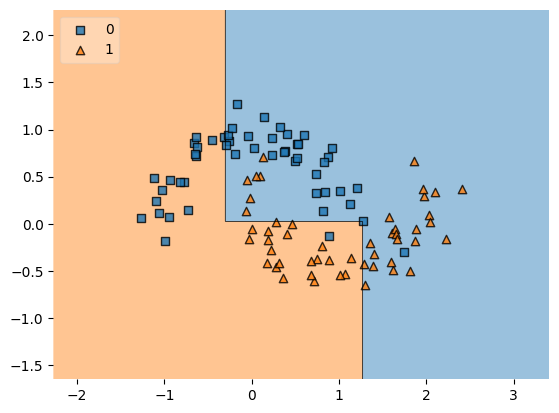

In [17]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

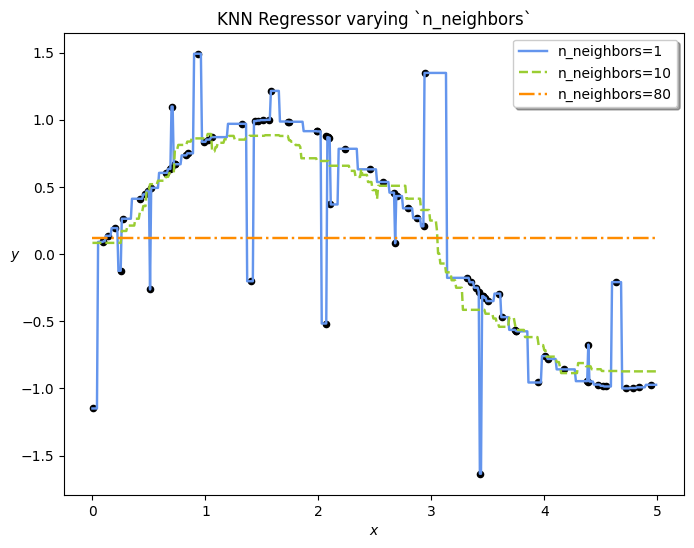

In [18]:
rng = np.random.RandomState(1)

X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=20, c="black")

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

linestyles = "solid", "dashed", "dashdot"
pallete = "cornflowerblue", "yellowgreen", "darkorange"
n_neighbors = 1, 10, 80

for n_neighbors, color, linestyle in zip(n_neighbors, pallete, linestyles):
    regr = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    y_pred = regr.predict(X_test)
    plt.plot(X_test, y_pred, color=color, label=f"n_neighbors={n_neighbors}", linewidth=1.75, linestyle=linestyle)

plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)

plt.title(f"KNN Regressor varying `n_neighbors`")
plt.legend(shadow=True)
plt.show()